In [9]:
import matplotlib.pyplot as plt
import numpy as np
import math

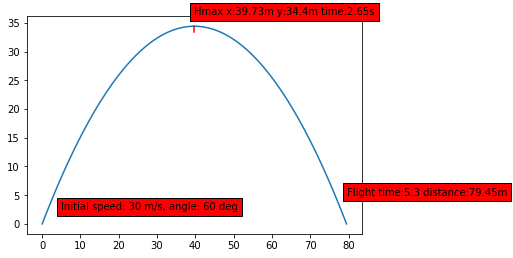

In [80]:
vy0 = lambda v, alfa: v * math.sin(math.radians(alfa))
vx0 = lambda v, alfa: v * math.cos(math.radians(alfa)) 

def h(t, v0, alfa):
    vy = vy0(v0, alfa)
    
    height = (vy*t - 0.5*9.81*t**2)
    if height < 0:
        return 0
    else:
        return height

h = np.vectorize(h)

def space(t, v0, alfa):
    vx = vx0(v0, alfa)
    
    return (vx*t)

def hmax(v0, alfa):
    vy = vy0(v0, alfa)
    return (vy**2/(2*9.81))

def flighttime(v0, alfa):
    vy = vy0(v0, alfa)
    
    return (vy/(0.5*9.81))

def xmax(v0, alfa):
    ftime = flighttime(v0, alfa)
    vx = vx0(v0, alfa)
    
    return vx * ftime

def heittoliike(v0, alfa):
    t = np.linspace(0,flighttime(v0, alfa), 100)
    x = space(t, v0, alfa)
    y = h(t, v0, alfa)

    plt.plot(x,y)
    plt.plot(np.full((2, ), xmax(v0,alfa)/2), np.linspace(hmax(v0, alfa)-1, hmax(v0,alfa), 2), 'red')
    plt.text(xmax(v0,alfa)/2, hmax(v0, alfa)+2, f'Hmax x:{round(xmax(v0,alfa)/2, 2)}m y:{round(hmax(v0,alfa), 2)}m time:{round(flighttime(v0,alfa)/2, 2)}s', bbox=dict(facecolor='red'))
    plt.text(xmax(v0,alfa), 5, f'Flight time:{round(flighttime(v0,alfa), 1)} distance:{round(xmax(v0,alfa), 2)}m', bbox=dict(facecolor='red'))
    plt.text(5, 2.5, f'Initial speed: {v0} m/s, angle: {alfa} deg', bbox=dict(facecolor='red'))
    
heittoliike(30, 60)